#### Imports

In [1]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/aug_test.csv
data/.DS_Store
data/aug_train.csv
data/sample_submission.csv


#### Loading dataset 

In [3]:
test = pd.read_csv('data/aug_test.csv')
train = pd.read_csv('data/aug_train.csv')

In [4]:
print('training set has {} rows and testing set has {} rows'.format(len(train), len(test)))

training set has 19158 rows and testing set has 2129 rows


In [5]:
print('there are {} people who are willing to work for the company, and {} who are not, giving us {:1f}'.format(len(train[train['target'] == 1]), len(train[train['target'] == 0]), len(train[train['target'] == 1])/ len(train)))


there are 4777 people who are willing to work for the company, and 14381 who are not, giving us 0.249348


Testing set doesn't have label (which is kinda useless when it comes to training our model), so I will primarily focus on the training data.  
However, the testing data could be merged when conducting unsupervised modeling techniques if need be (which is a little out of the scope of this week's deliverables). 

## Research Questions and Metrics 

#### Premise 

The company DS offers data science courses to invest in talent in the long run. In this case, the willingness to start working at DS is the potential increase in talent, the hours trained from each trainee would be the cost(courses recorded, mentorship, website maintaince, office hours, etc)  , and the amount of enrollment would be the revenue. 

Hence, for DS to optimize this service, it aims to increase the trainee's willingness to return, while aim to decrease their training hours in the process without decreasing the learning experience. Therefore, it is beneficial for DS to find out 
- What are the kind of people who are training more hours?
- Are people who train more willing to return to DS? 
- What kind of characteristics do DS-returning people have? 

In this project, I take a jab at these questions, and in this week's deliverable, I will come up with their metrics, EDA, and preliminary ML models

#### Research Questions 


- Do people who want to return to DS train more than those who don't want to return? 
    - 2 Student T test 
- Can we predict how many hours of training a new enrollee would take? 
    - Linear Regression 
        - Metrics: RMSE 
    - Random Forrest 
        - Metrics: RMSE 

- Can we predict who wants to return to DS based on usefull information? 
    - Logistic Regression 
        - Metrics: confusion matrix 
    - Random Forrest 
        - Metrics: RMSE 
    

## Pre-wrangle Data Visualization

### Nominal Variable Analysis 

Before data wrangling, I'd like to make some very simple univariate analysis. I decide not to clean the dataset here, because lots of otherwise existing would be deleted when excluding the rows with null values.  

Here, I aim to get preliminary insight to how the data is distributed. 

In [6]:
## groupby and aggregating colummns to target to get visualization
gender = train.groupby(['gender', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
experience = train.groupby(['relevent_experience', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
company_size = train.groupby(['company_size', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
enrolled_university = train.groupby(['enrolled_university', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
major_discipline = train.groupby(['major_discipline', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()


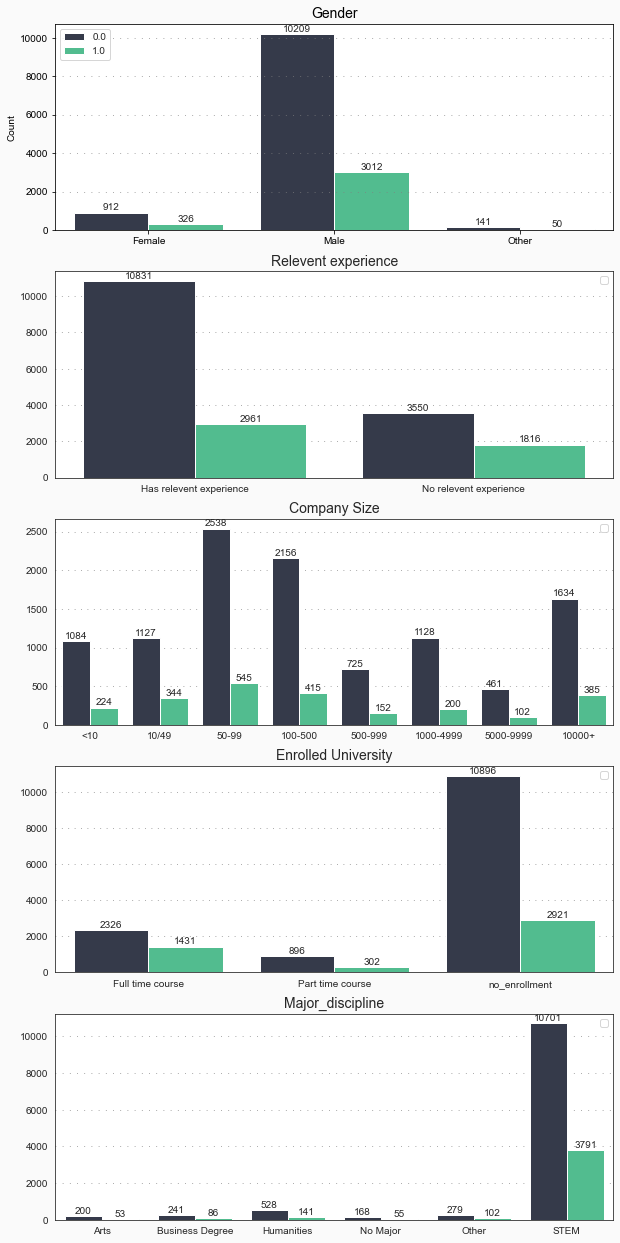

In [7]:
fig = plt.figure(figsize = (22, 22))
fig.patch.set_facecolor('#fafafa')


## plotting gender vs target
plt.subplot(521)
sns.set_style('white')
plt.title('Gender', size = 14)
plt.grid(color = 'gray', linestyle = ':', 
         axis = 'y', zorder = 0,  dashes = (1,8))
a = sns.barplot(data = gender, x = gender['gender'], 
                y = gender['count'], hue = gender['target'], 
                palette = ['#32384D', '#40ce91'])
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.ylabel('Count')
plt.xlabel('')
plt.legend(loc = 'upper left')



## plotting experience vs target
plt.subplot(523)
plt.title('Relevent experience', size = 14)
a2 = sns.barplot(data = experience, x = experience['relevent_experience'], 
                 y = experience['count'], hue = experience['target'], 
                 palette = ['#32384D', '#40ce91'])
for p in a2.patches:
    height = p.get_height()
    a2.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', 
         zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')



## plotting company size vs target
plt.subplot(525)
plt.title('Company Size', size = 14)
a3 = sns.barplot(data = company_size, x = company_size['company_size'], 
                 y = company_size['count'], hue = company_size['target'], 
                 palette = ['#32384D', '#40ce91'],
                order=['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'])
for p in a3.patches:
    height = p.get_height()
    a3.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', 
         zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

## plotting enrolled college vs target
plt.subplot(527)
plt.title('Enrolled University', size = 14)
a4 = sns.barplot(data = enrolled_university, x = enrolled_university['enrolled_university'],
                y = enrolled_university['count'], hue = enrolled_university['target'],
                palette = ['#32384D', '#40ce91'])

for p in a4.patches:
    height = p.get_height()
    a4.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', 
         zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

## plotting major vs target
plt.subplot(529)
sns.set_style('white')
plt.title('Major_discipline', size = 14)
plt.grid(color = 'gray', linestyle = ':', 
         axis = 'y', zorder = 0,  dashes = (1,8))
a5 = sns.barplot(data = major_discipline, x = major_discipline['major_discipline'], 
                y = major_discipline['count'], hue = major_discipline['target'], 
                palette = ['#32384D', '#40ce91'])
for p in a5.patches:
    height = p.get_height()
    a5.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

    
plt.ylabel('')
plt.xlabel('')
plt.legend('')
plt.show()

In [8]:
len(train[train['major_discipline'] == 'STEM']) / len(train[train['major_discipline'].notnull()])

0.8866319975527684

Interesting Findings 
- Gender -- There are way more males than females (and others) enrolled in the program, but the percentage of those who are willing to work for DS is approximately the same (23% vs 26%)
- Relevent experience -- people with no relevant experience are way more likely (34%) to be willing to work for DS than those who have relevant experience (21%)
    - This might be attributed by the fact that those without experience are still in college, or that they seek immediate work after changing their career from other fields 
- Company size -- People in different types of companies typically have the same percentage of willing to work for DS at around 1/6 ~ 16%. 
    - With the whole dataset's rate of having people who are willing to work for DS at 25%, there has to be amounts of people who are willing to work for DS somewhere. I suspect that those people are captured by null and thus are unintentionally excluded by the dataset. Further inspection is needed to validate this theory. 
- Enrolled university -- People who are enrolled in full time courses (38%) are more likely to be willing to work for DS than those who are enrolled in part time courses (25%) and those who are not enrolled at all (21%) 
    - Again, this might be attributed by the fact that students coming out of college are more willing to seek immediate work than those who have been in the industry. 
- Major discipline -- vast majority of the people enrolled in the program comes from a STEM background. 

#### Digging a little more...

With the percentage of people willing to work for DS at different company sizes hovering around 16 percent, it begs the question of what contributes to the discrepency with its percentage and the dataset's overall percentage of 25%. Some data analysis here aims to figure that out 

In [9]:
train['company_size'].isnull().sum()

5938

In [10]:
## setting the company_size null values as -1  
train['company_size'].fillna(-1, inplace = True)

In [11]:
company_size = train.groupby(['company_size', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

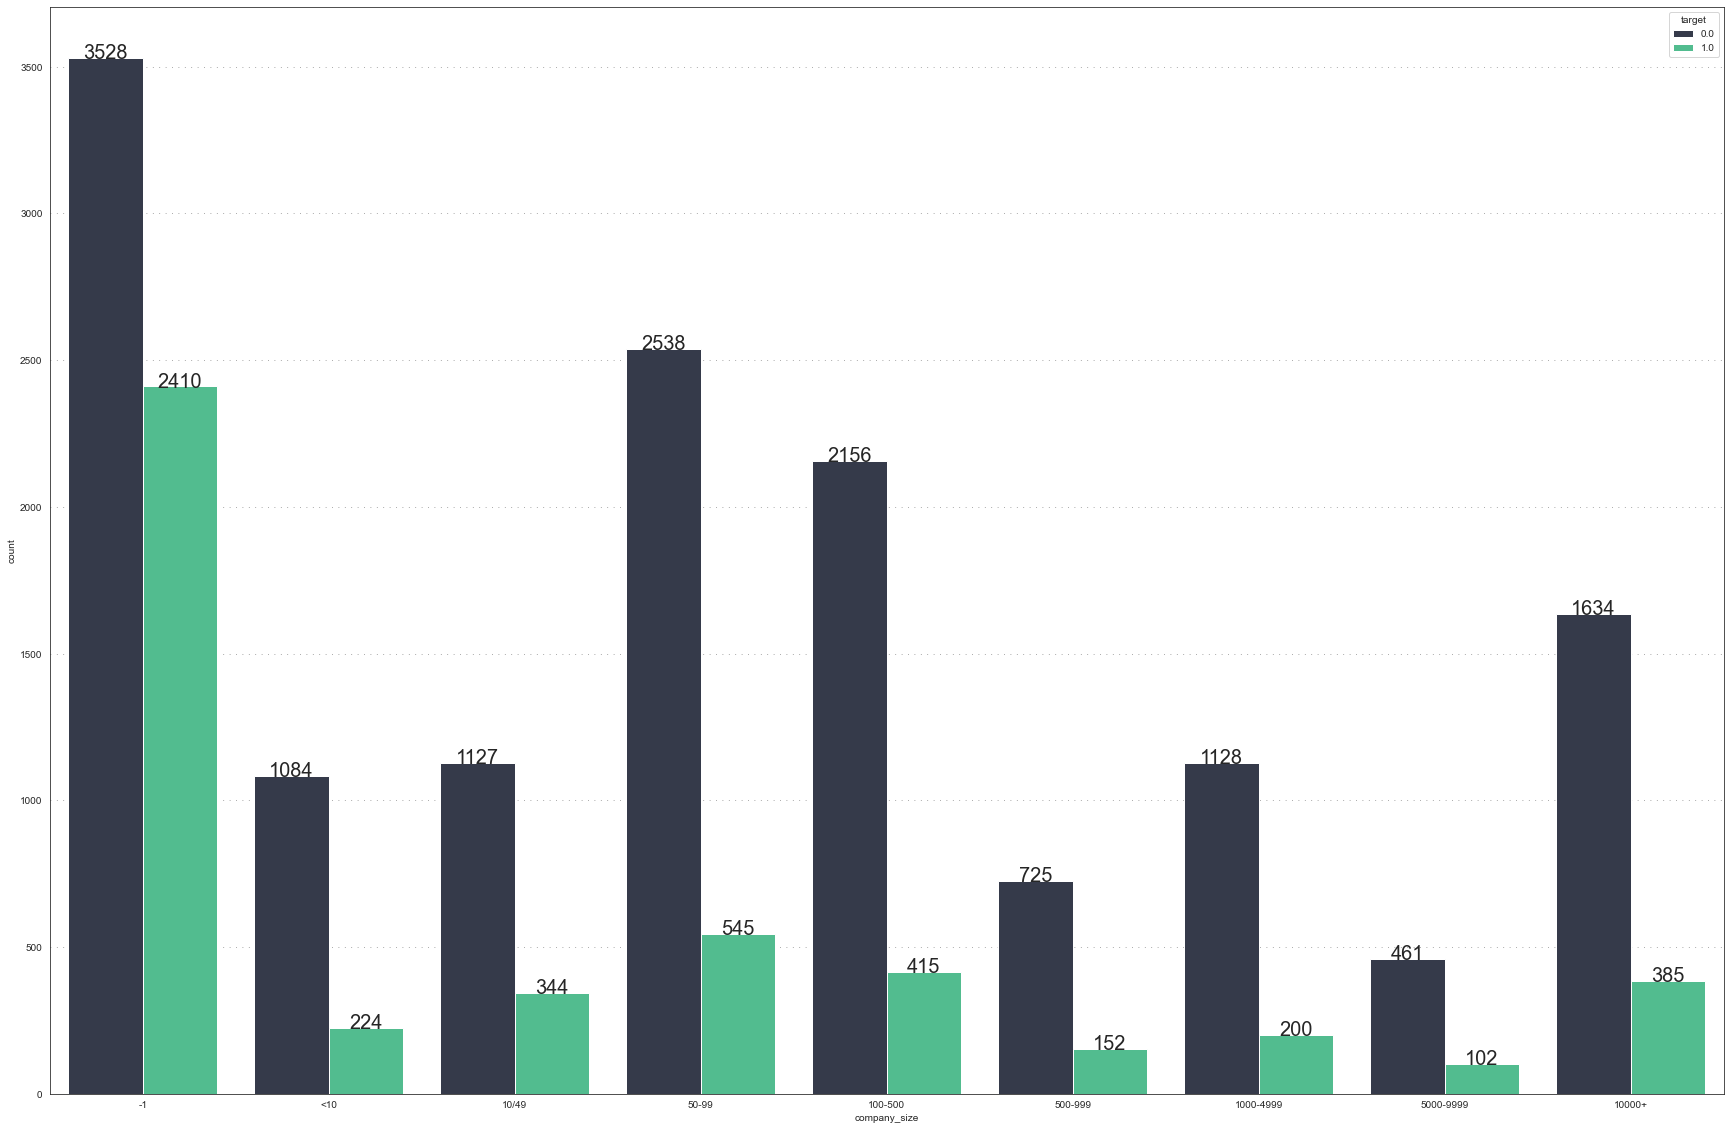

In [12]:
fig = plt.figure(figsize = (30, 20))
ax = sns.barplot(data = company_size, x = company_size['company_size'], 
                 y = company_size['count'], hue = company_size['target'], 
                 palette = ['#32384D', '#40ce91'],
                order=[-1, '<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 20,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))

As we can see, the entries of the values that are labeled as null in the company_size column contain high amounts of people who are willing to work for DS.  
This gives us a couple of insights 
- The null value capture those who don't have industry experience yet, ie people in college or from other industries, and those people are more willing to immediately work for the company for industry exposure 
- It would be irresponsible to blindly eliminate null values from this column
    - One Solution is to use the relevent column to replace null values with a value that indicates those who haven't had experience yet 

In [13]:
train['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [14]:
train[train['company_size'] == -1]['relevent_experience'].value_counts()

No relevent experience     3357
Has relevent experience    2581
Name: relevent_experience, dtype: int64

From above, we see that almost 3/5 of the entries with company_size as null have no relevent experience. The relevent experience column will be used to wrangle null values and save a bunch of very important entries 

In [15]:
## setting the entries with null company size and no relevent experience as 0
m = (train['company_size'] == -1) & (train['relevent_experience'] == 'No relevent experience')

train.loc[m, ['company_size']] = 0
## setting the entries with null company with relevent experience back to null
n = (train['company_size'] == -1) & (train['relevent_experience'] == 'Has relevent experience')

train.loc[n, ['company_size']] = np.nan

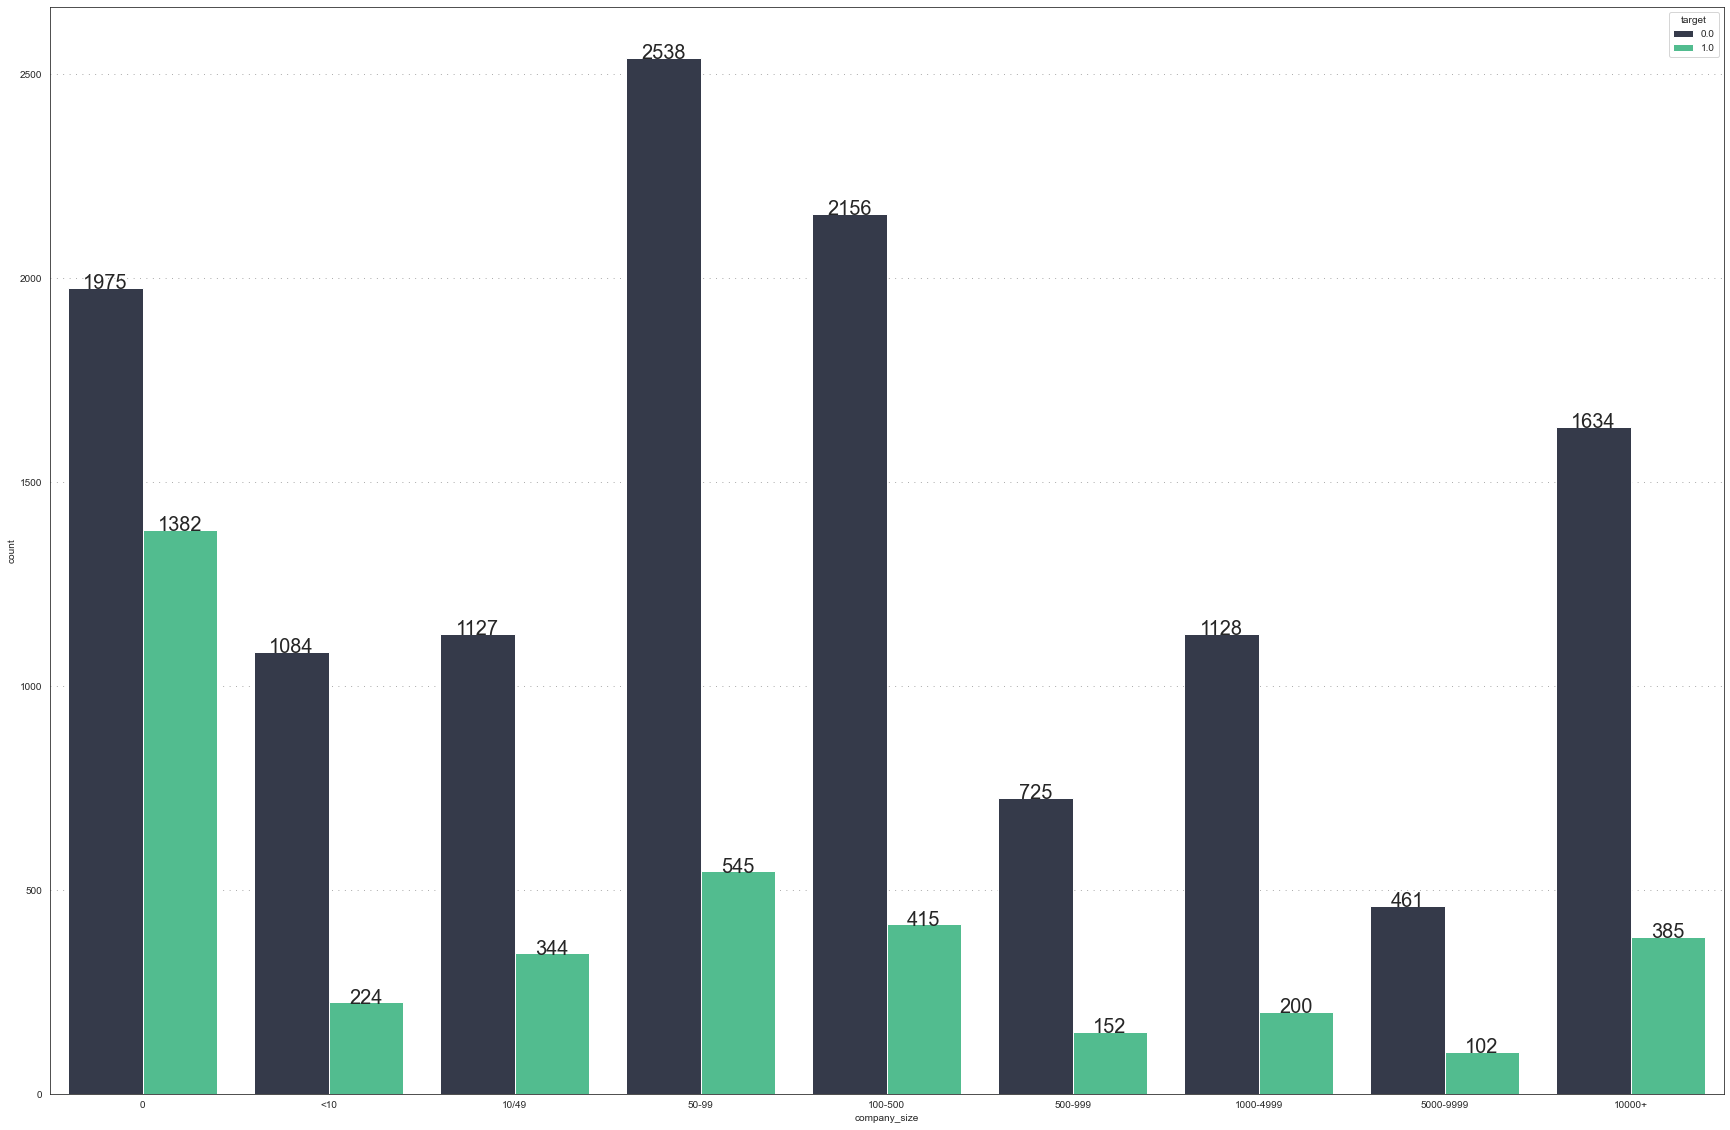

In [16]:
company_size = train.groupby(['company_size', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
fig = plt.figure(figsize = (30, 20))
ax = sns.barplot(data = company_size, x = company_size['company_size'], 
                 y = company_size['count'], hue = company_size['target'], 
                 palette = ['#32384D', '#40ce91'],
                order=[0, '<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 20,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
sns.set(font_scale = 2)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))

As we can see, people without relevant experience (doesn't have a company right now) are more prone to willing to work for DS. This makes sense as people from college/ different fields would want real world experience as soon as possible.  
Of course, using relevent experience to retain information has its downside, since it doesn't capture the information of those who are in between data science jobs. However, from the metrics that we have right now, this is the best we could do. 

#### Digging Deeper 

In [17]:
## transform company size into small, 

company_size_map = {
    0              :    0,
    '<10'          :    'small sized company',
    '10/49'        :    'small sized company', 
    '50-99'        :    'small sized company',
    '100-500'      :    'mid sized company', 
    '500-999'      :    'mid sized company', 
    '1000-4999'    :    'large sized company', 
    '10000+'       :    'large sized company',  
    '5000-9999'    :    'large sized company'
}



In [18]:
train['company_size'] = train['company_size'].map(company_size_map)

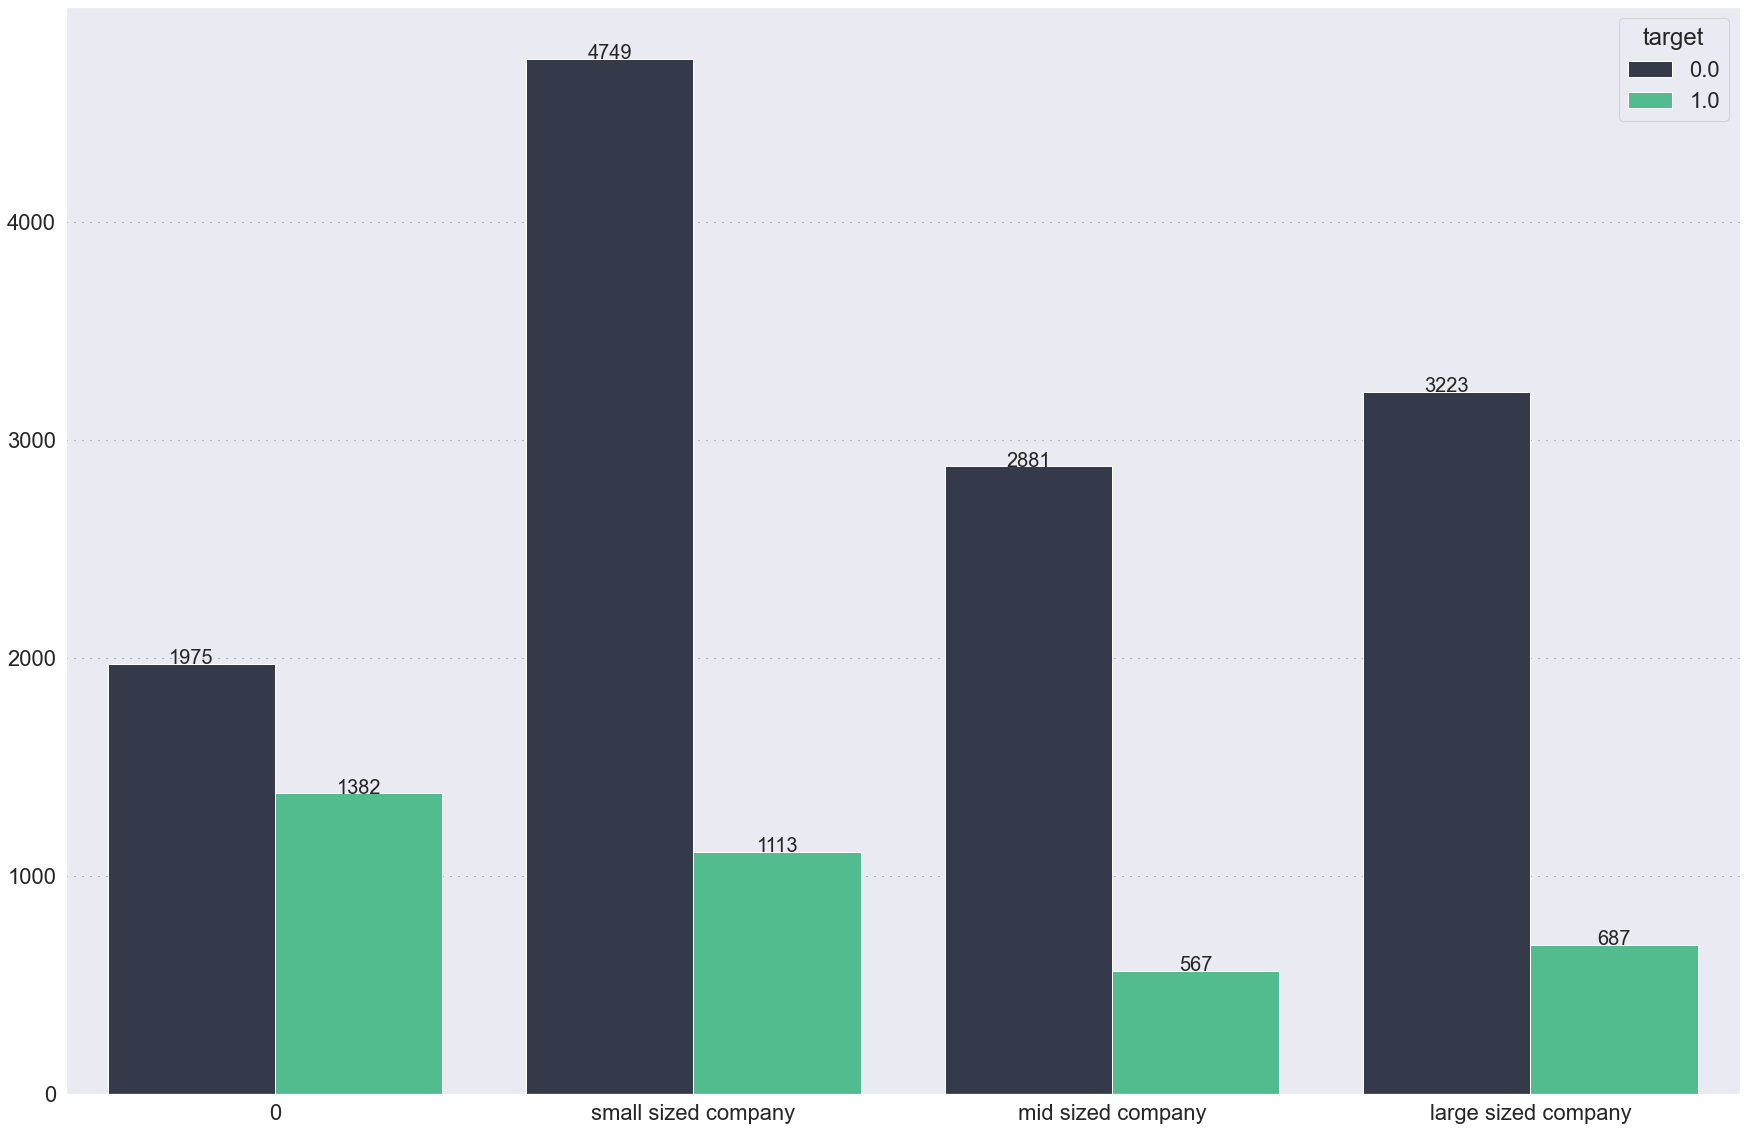

In [19]:
company_size = train.groupby(['company_size', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()
fig = plt.figure(figsize = (30, 20))
ax = sns.barplot(data = company_size, x = company_size['company_size'], 
                 y = company_size['count'], hue = company_size['target'], 
                 palette = ['#32384D', '#40ce91'],
                 order = [0, 'small sized company', 'mid sized company', 'large sized company']
                 )
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 20,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.show()

In [20]:
## helper function to get percentage of barplots
def percent(data):
    data['percent'] = 0
    for i in range(len(data.index)):
        if data.index[i] % 2 == 0:
            data.iloc[i, 3] = round((data.iloc[i, 2] / (data.iloc[i, 2] + data.iloc[i+1, 2])) * 100, 1)
        else:
            data.iloc[i, 3] = round((data.iloc[i, 2] / (data.iloc[i, 2] + data.iloc[i-1, 2])) * 100, 1)

In [21]:
percent(company_size)

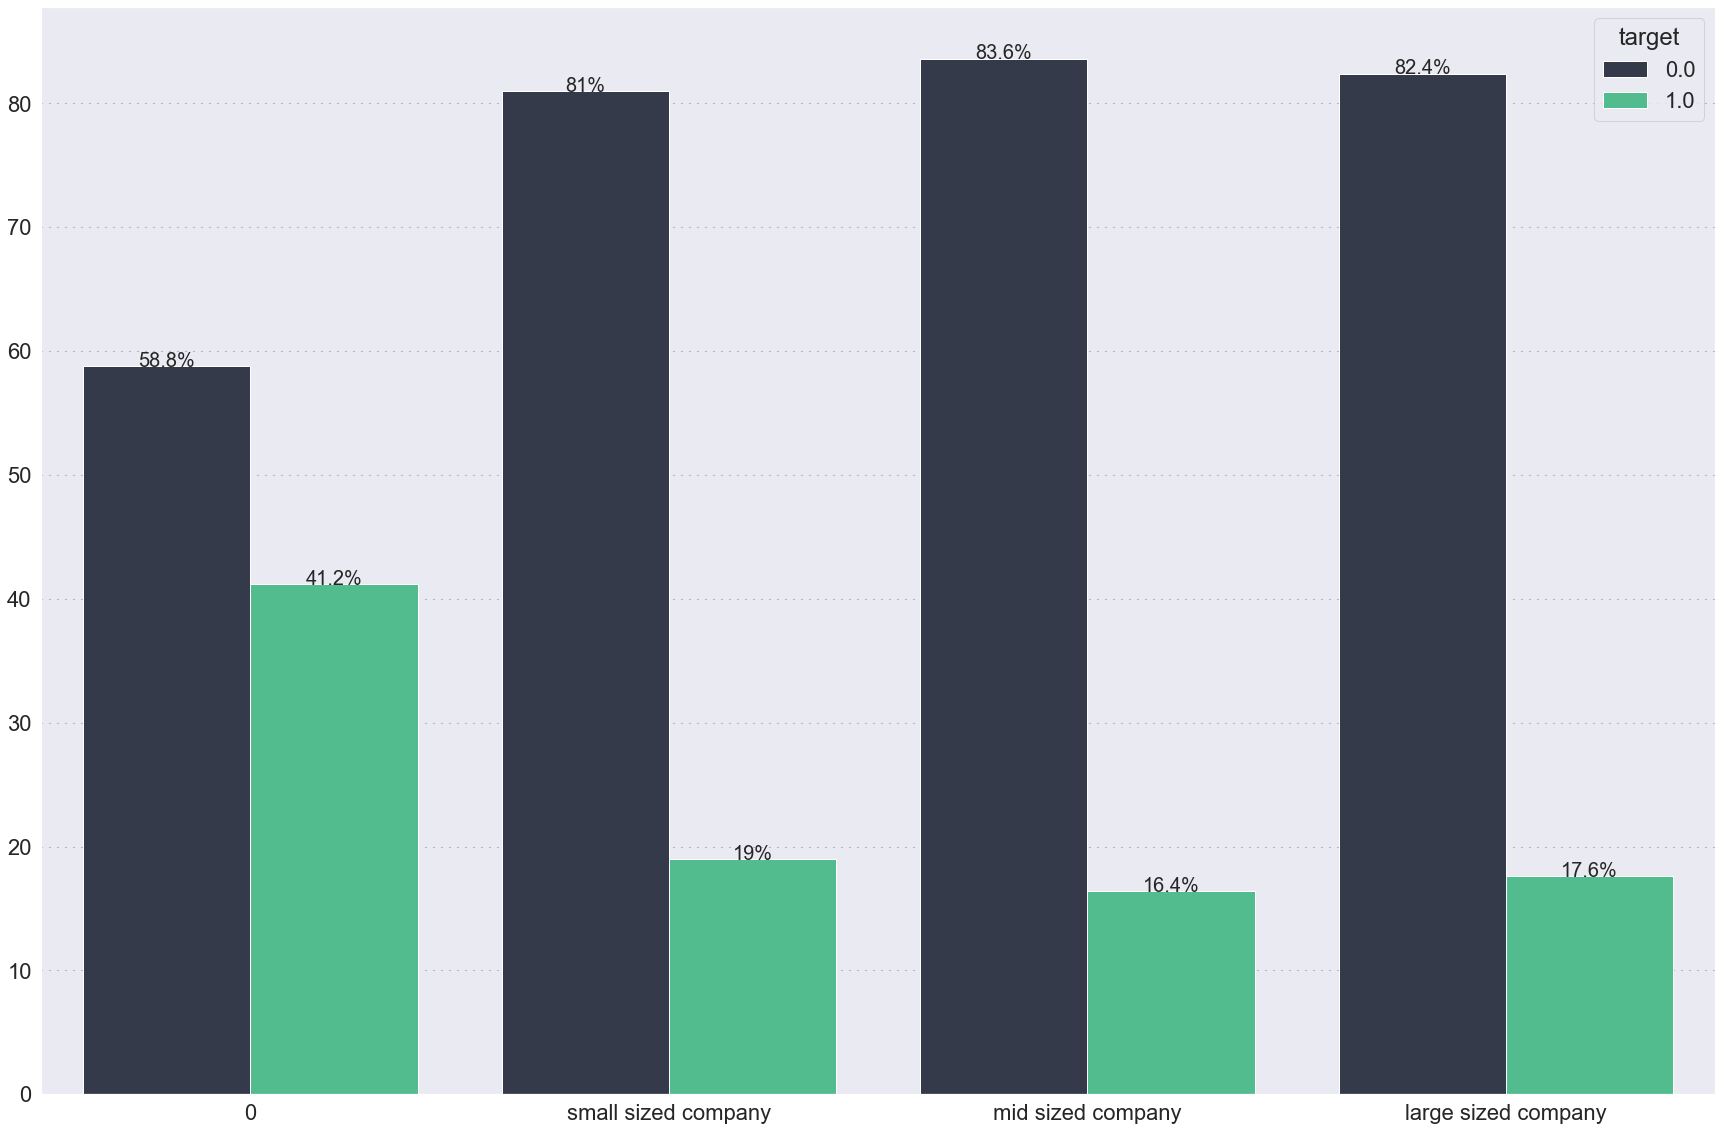

In [22]:
fig = plt.figure(figsize = (30, 20))
ax = sns.barplot(data = company_size, x = company_size['company_size'], 
                 y = company_size['percent'], hue = company_size['target'], 
                 palette = ['#32384D', '#40ce91'],
                 order = [0, 'small sized company', 'mid sized company', 'large sized company']
                 )
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 20,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.show()

#### Findings 

We see that enrollees who are currently in companies have about the same retention rate across different sizes of companies, hovering around 18%. On the other hand, the retention rate of those who are not in companies right now is 41%.  

In [23]:
train['company_size'].value_counts()[0] / len(train)

0.17522705919198245

Enrollees who aren't in companies account for about around 17.5% of the program. 

In the interest to increase potential candidates and the effectiveness of the program, DS should aim to deploy strategies that increase the enrollment of people who are not in companies. Of course, this disregards the disparity in ability between those with experience and those without experience, but the measurement of competence of candidates is beyond the scope of this project.


In [24]:
train['company_size'].value_counts()['small sized company'] / len(train)

0.3059818352646414

In the interest to increase revenue from enrollees signed up for this program, DS should deploy strategies that attract more people in small sized companies. From this dataset, people in small sized companies naturally gravitate more towards the program (30% of the enrollees are people in small sized companies), and they also have the highest rate of willing to work for DS amongst other sized companies at 19%. 

## Data Wrangling

Before diving into EDA, let's transform the dataset so that it is analysable 

### Handling Data Types 

As we can see, most columns in this dataset is ordinal. However, they are stored in the object type, and must be converted into a analytics-friendly formatt. 

In [25]:
## combining training and testing together to better clean the dataset 
test['target'] = -1
df_comb = pd.concat([train,test], axis=0).reset_index(drop = True)

In [26]:
## create dictionary to map values into combined dataset 
# Making Dictionaries of ordinal features

gender_map = {
        'Female': 2,
        'Male': 1,
        'Other': 0
         }

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}
    
education_level_map = {
    'Primary School' :    0,
    'High School'    :    1,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'Phd'            :    4
    } 
    
major_map ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}
    
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

company_size_map = {
    0                       :    0,
    'small sized company'   :    1,
    'mid sized company'     :    2, 
    'large sized company'   :    3
}
    
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [27]:
## create another dictionary to map all of this into combined df
dictlist = {'gender' : gender_map,
            'relevent_experience' : relevent_experience_map,
            'enrolled_university' : enrolled_university_map,
            'education_level' : education_level_map,
            'major_discipline' : major_map,
            'experience' : experience_map,
            'company_size' : company_size_map,
            'last_new_job' : last_new_job_map}

In [28]:
## linking this to our dataset 
for key, value in dictlist.items():
    #print(key, dictlist[key])
    df_comb.loc[:,key] = df_comb[key].map(value)

### Dropping Columns

Looks much better now, let's delete columns that doesn't deem indicative to our analysis 

In [29]:
df_comb = df_comb.copy().drop(['city', 'major_discipline','enrollee_id', 'company_type', 'gender'], axis = 1)

Dropping 
- city
    - This column overlapps a little with city_development_index, while being a less informative column. Plus, the city values are extremely confusing, there isn't a dictionary that tells us what the values corresponds to, and to no avail after much research
- major discipline 
    - This column also doesn't offer that much insight, with vast majority of the candidates being in STEM, and the distribution of people willing to work for DS across different majors being approximately the same. 
- enrollee_id 
    - The unique identifier of the enrollees isn't relevent to their characteristics 
- company type 
    - There are way too many null values here that dropping the rows that are null would deplete too much insight of that dataset. Moreover, it overlaps a little to the company_size column, while offerring a little less (way too granular) insight 
- gender 
    - This is the hardest column to let go of. But there are too many null values, and that the distribution of people who are willing to work for the company between males and females are approximately the same, at 23% and 26% respectively

In [30]:
##finally, separating testing and training data 
training = df_comb[df_comb['target'] != -1]
testing = df_comb[df_comb['target'] == -1]

In [31]:
## deleting the target column of testing 
del testing['target']

### Continuous Variable Analysis 

In [32]:
## creating column variable to help visualization
## making experience and last job because there are null values in these
experience = training[pd.isna(training['experience']) == False]

last_job = training[pd.isna(training['training_hours']) == False]


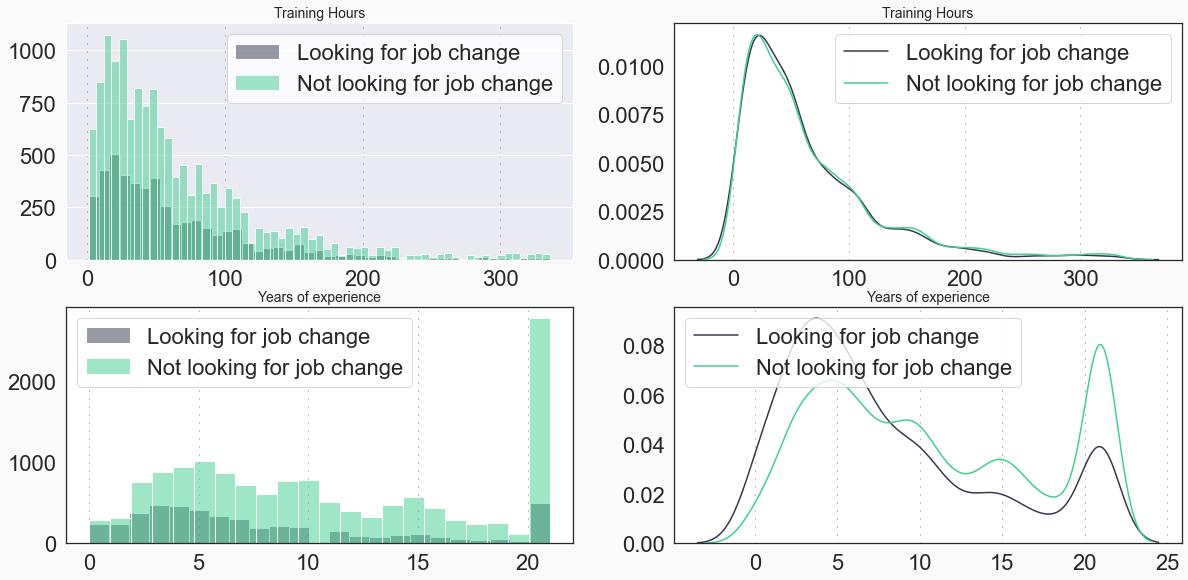

In [33]:
fig = plt.figure(figsize = (20, 20))
fig.patch.set_facecolor('#fafafa')

## Training Hours
plt.subplot(423)
sns.set_style('white')
plt.title('Training Hours', size = 14)
sns.histplot(training.query('target == 1')['training_hours'], color = '#32384D', label = 'Looking for job change', alpha = 0.5)
sns.histplot(training.query('target == 0')['training_hours'], color = '#40ce91', label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')

plt.legend(loc = 'upper right')

plt.subplot(424)
sns.set_style('white')
plt.title('Training Hours', size = 14)
sns.kdeplot(training.query('target == 1')['training_hours'], color = '#32384D', label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(training.query('target == 0')['training_hours'], color = '#40ce91', label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')

plt.legend(loc = 'upper right')

## Years of experience 
plt.subplot(425)
sns.set_style('white')
plt.title('Years of experience', size = 14)
sns.histplot(experience.query('target == 1')['experience'], color = '#32384D', label = 'Looking for job change', alpha = 0.5)
sns.histplot(experience.query('target == 0')['experience'], color = '#40ce91', label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend(loc = 'upper left')

plt.subplot(426)
sns.set_style('white')
plt.title('Years of experience', size = 14)
sns.kdeplot(experience.query('target == 1')['experience'], color = '#32384D', label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(experience.query('target == 0')['experience'], color = '#40ce91', label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend(loc = 'upper left')

- We see that enrollees who are willing to return to DS have approximately the same training hour distribution as those who are not willing to return, despite having cononsistently fewer enrollees at each training hour levels 
- We find that enrolless who have fewer years of experience are much more willing to return to DS than those who have more years of experience in data science. 
    - This also might be explained by the type of jobs offered: people with more experiences typically look for senior positions which responsibilities are probably not covered by simple data science courses, whereas people with less experience might feel more appealed to entry level data science positions with the courses they've just been exposed to

### Company Size and Training Hours 

From previous visualizations, we found that enrolles without being in a company are more willing to retain in DS than those who are in companies. Moreover, we also found that people in small companies compose of the highest enrolles in the dataset. Let's find out how the training hours in their respective training hours look like. 

In [34]:
company_size = training[pd.isna(training['company_size']) == False]

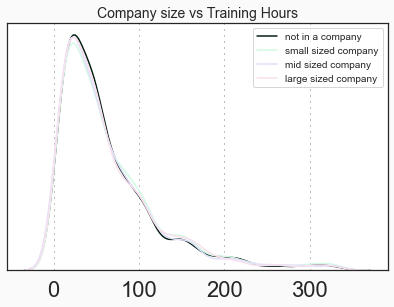

In [35]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('#fafafa')

plt.subplot(221)
sns.set_style('white')
plt.title('Company size vs Training Hours', size = 14)
sns.kdeplot(company_size.query('company_size == 0')['training_hours'], color = '#041f11', label = 'not in a company', alpha = 0.5)
sns.kdeplot(company_size.query('company_size == 1')['training_hours'], color = '#d2f9e3', label = 'small sized company', alpha = 0.5)
sns.kdeplot(company_size.query('company_size == 2')['training_hours'], color = '#e0e0fb', label = 'mid sized company', alpha = 0.5)
sns.kdeplot(company_size.query('company_size == 3')['training_hours'], color = '#fbe0ef', label = 'large sized company', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,5))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper right', prop={"size":10})

From this, we see that enrollees in different sizes of companies devote about the same amount of time in their training hours. Combined with the above discovery that enrollees who are willing to return to DS spend the same amount of training hours as those who are not willing to return to DS, we could infer that the enrollee's company size has little to do with how much time they devote in training hours.  
Thus, using company size to attempt to decrease the cost of training hours would bring little to no fruition. 

### Dealing with Null Values 

In [36]:
df_comb.isnull().sum()

city_development_index       0
relevent_experience          0
enrolled_university        417
education_level            512
experience                  70
company_size              4710
last_new_job               463
training_hours               0
target                       0
dtype: int64

In [37]:
## percentage of missing values 
df_comb.isnull().sum() / len(df_comb)

city_development_index    0.000000
relevent_experience       0.000000
enrolled_university       0.019589
education_level           0.024052
experience                0.003288
company_size              0.221262
last_new_job              0.021750
training_hours            0.000000
target                    0.000000
dtype: float64

In [38]:
## dropping null values to see if data has been impeded too much 
df_cleaned = df_comb.dropna(axis = 0)
df_cleaned.shape

(15621, 9)

In [39]:
## separating training and testing 
training = df_cleaned[df_cleaned['target'] != -1]
testing = df_cleaned[df_cleaned['target'] == -1]

In [40]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15621 entries, 1 to 19157
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  15621 non-null  float64
 1   relevent_experience     15621 non-null  int64  
 2   enrolled_university     15621 non-null  float64
 3   education_level         15621 non-null  float64
 4   experience              15621 non-null  float64
 5   company_size            15621 non-null  float64
 6   last_new_job            15621 non-null  float64
 7   training_hours          15621 non-null  int64  
 8   target                  15621 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.2 MB


### Statistical Analysis 

#### Training hours and Target

I'd like to further examine the relationship between training hours and target.   
I will use the Student T's test to inspect whether the mean of the people who are not willing to stay in the company's training hour is different than those who are willing to stay in the company.  
We have 
- H0 => the training hours of people who want to stay and people who want to leave are the same
- H1 => the training hours of people who want to stay have a higher training hour average than those who want to leave 

The alpha in this statistical experiment would be equal to 0.05, and it would be a 1 tail t test

If we reject the null hypothesis, then we would obtain a statistical confidence that the differences between these 2 groups would not have happened by chance. 

In [43]:
from scipy import stats
def student_t(target_stay, target_leave):
    """
    Function that gives us the T score and P score of the statistical test
    The arguments are numpy arrays that contain the training hours of the
        two groups 
    """
    t, p = stats.ttest_ind(target_stay, target_leave, equal_var = False)
    
    print('The T-score is {}, and the P-value is {}'.format(t, p/2)) ##p/2 because one tail
    
    if p/2 < 0.05:
        print('With 95% confidence, we reject the null hypothesis and conclude that there is a statistical differences between the mean of the 2 groups')
    else:
        print('With 95% confidence, we fail to reject the null hypothesis and conclude that there is no statistical differences between the mean of the 2 groups')
        
        

In [44]:
training_hours_stay = training[training['target'] == 1].training_hours.to_numpy()
training_hours_leave = training[training['target'] == 0].training_hours.to_numpy()


In [45]:
training_hours_stay.mean()

62.86472454571676

In [46]:
training_hours_leave.mean()

65.98412045417146

In [47]:
student_t(training_hours_stay, training_hours_leave)

The T-score is -2.772351474013779, and the P-value is 0.002791439752889458
With 95% confidence, we reject the null hypothesis and conclude that there is a statistical differences between the mean of the 2 groups


With much suprise, we see it is statistically significant that enrollees who are willing to stay in DS on average train fewer hours than those who are not willing to stay in DS. 

## In the POV of a CEO....

## Data Modelling

### Data Wrangling for Modelling

For the most part, because I already transformed data types into its appropriate forms, all I have to do now is normalizing the columns that need be

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [108]:
## getting dataset and label 
training_label = training.iloc[:, -1]
training_data = training.iloc[:, :-1]

In [49]:
training_num = ['city_development_index', 'experience', 'training_hours']
training_cat = [ 'relevent_experience', 'enrolled_university',
                'education_level', 'company_size',
               'last_new_job']

In [50]:
training.columns

Index(['city_development_index', 'relevent_experience', 'enrolled_university',
       'education_level', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

#### Tranformation Pipline

In [109]:
full_pipline = ColumnTransformer([
    ('num', StandardScaler(), training_num),
    ('cat', OneHotEncoder(), training_cat)
])

training_prepared = full_pipline.fit_transform(training_data)

#### Obtaining training and testing datasets

Again, the testing dataset doesn't give us the label of the testing data, so the utility of the testing set is limited to unsupervised learning models.  
Here, with the intention of building supervised learning models, I will split the training set into training and testing sets to acheive that goal. 

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    training_prepared, training_label, test_size = 0.2, random_state = 0)

### Model Selection and Training 

#### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [114]:
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


##### Confusion Matrix

In [116]:
y_test_pred = log_reg.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[2241,  135],
       [ 547,  202]])

2241 enrollees who are not willing to return to DS are predicted correctly  

547 enrollees who are not willing to return to DS are predicted as those who are willing to return  

135 enrollees who are willing to return to DS are predicted as those who are not willing to return 

202 enrollees who are willing to return to DS are predicted correctly


##### ROC

In [80]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import classification_report

In [122]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87      2376
         1.0       0.60      0.27      0.37       749

    accuracy                           0.78      3125
   macro avg       0.70      0.61      0.62      3125
weighted avg       0.75      0.78      0.75      3125



In [123]:
## grabbing the decision score of the model
y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3,
                                 method="decision_function")

## getting the parameters necessary for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [124]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], '--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')    
    plt.grid(True)      

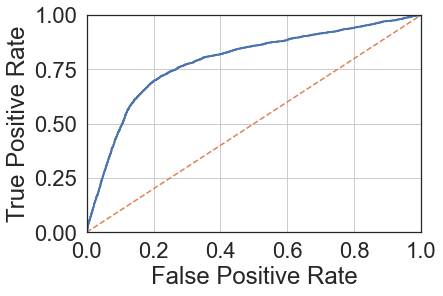

In [125]:
plot_roc_curve(fpr, tpr)
plt.show()

In [126]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.788426354247518

TODO add interpretation

#### Random Forrest

In [183]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()


In [184]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [185]:
y_pred = forest_clf.predict(X_test)
print('Accuracy of random forrest classifier on test set: {:.2f}'.format(forest_clf.score(X_test, y_test)))

Accuracy of random forrest classifier on test set: 0.78


##### Confusion Matrix 

In [186]:
y_test_pred1 = forest_clf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[2241,  135],
       [ 547,  202]])

##### ROC

In [187]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87      2376
         1.0       0.60      0.27      0.37       749

    accuracy                           0.78      3125
   macro avg       0.70      0.61      0.62      3125
weighted avg       0.75      0.78      0.75      3125



### Feature Selection with Random Forest to Retention Rate

In some parts of the EDA, I hypothesized that one of the bigger factors that indicates enrollee's willingness to return to DS is their training hours. However, from visualizations that hypothesis becomes somewhat unclear.  
Here, we attempt to use feature selection in random forest to determine
1. whether training hour is one of the best indicators for willingness to return  
2. if not, what are the features that are good indicators 

First, let's normalize the continuous data

In [196]:
## helper function to get the scaled data 
def min_max_scaling(df, cols):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in cols:
        df_norm[cols] = (df_norm[cols] - df_norm[cols].min()) / (df_norm[cols].max() - df_norm[cols].min())
        
    return df_norm

In [197]:
training_normed = min_max_scaling(training, training_num)

In [199]:
training_label1 = training_normed.iloc[:, -1]
training_data1 = training_normed.iloc[:, :-1]

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    training_data1, training_label1, test_size = 0.2, random_state = 0)


In [200]:
forest_clf_sel = RandomForestClassifier()
forest_clf_sel.fit(X_train1, y_train1)

RandomForestClassifier()

In [201]:
pd.DataFrame(forest_clf_sel.feature_importances_, 
      index =training.iloc[:, :-1].columns,  
      columns=['importance']).sort_values('importance', ascending=False)

,importance
training_hours,0.312560
city_development_index,0.290075
experience,0.154013
company_size,0.074128
last_new_job,0.067142
education_level,0.051251
enrolled_university,0.029725
relevent_experience,0.021106


### Feature Selection with Random Forest to Training Hours 

I'm also curious about what variables contribute to enrollee's training hours. A simple feature selection with random forest regression could give us a little bit of insight

In [180]:
training_label2 = training.iloc[:, -2]
training_data2 = training.iloc[:, np.r_[:7, -1]]

In [182]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
forest_reg = RandomForestRegressor()
forest_reg.fit(training_data2, training_label2)

RandomForestRegressor()

In [190]:
pd.DataFrame(forest_reg.feature_importances_, 
      index =training.iloc[:, np.r_[:7, -1]].columns,  
      columns=['importance']).sort_values('importance', ascending=False)

,importance
city_development_index,0.284956
experience,0.268848
last_new_job,0.147768
education_level,0.084298
company_size,0.083824
enrolled_university,0.068664
relevent_experience,0.036758
target,0.024882
